### Exploratory Data Analysis (EDA) on Retail Sales Data

### Import required libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [4]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\customer_shopping_data.csv")

In [5]:
df.head(7)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24-05-2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13-03-2022,Istinye Park


In [6]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15-10-2022,Mall of Istanbul


In [7]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [8]:
df.shape

(99457, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [10]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [11]:
#checking for number of null values in each column
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [12]:
#Finding for duplicate values
df.duplicated().sum()

0

In [13]:
#exploring the unique values of each attribute
print("Number of transactions: ",df['invoice_no'].nunique())
print("Number of customers:",df['customer_id'].nunique() )
print("Number of categories: ",df['category'].nunique())
print("Number of shopping malls: ",df['shopping_mall'].nunique())

Number of transactions:  99457
Number of customers: 99457
Number of categories:  8
Number of shopping malls:  10


In [14]:
print("Number of male and female customers:",df['gender'].value_counts())


Number of male and female customers: Female    59482
Male      39975
Name: gender, dtype: int64


In [15]:
print("Payment method:",df['payment_method'].value_counts())

Payment method: Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [16]:
#get cancelled orders:
cancelled_orders = df[df['invoice_no'].astype(str).str.contains('C')]
cancelled_orders.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [17]:
df.groupby('category')['customer_id'].count()

category
Books               4981
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Shoes              10034
Souvenir            4999
Technology          4996
Toys               10087
Name: customer_id, dtype: int64

In [18]:
df.groupby(['shopping_mall','category'])['customer_id'].count()

shopping_mall  category       
Cevahir AVM    Books               258
               Clothing           1729
               Cosmetics           732
               Food & Beverage     772
               Shoes               490
                                  ... 
Zorlu Center   Food & Beverage     750
               Shoes               519
               Souvenir            257
               Technology          250
               Toys                513
Name: customer_id, Length: 80, dtype: int64

In [19]:
df.groupby('gender')['payment_method'].value_counts()

gender  payment_method
Female  Cash              26509
        Credit Card       21011
        Debit Card        11962
Male    Cash              17938
        Credit Card       13920
        Debit Card         8117
Name: payment_method, dtype: int64

In [32]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
print(df.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  Month  Year  
0    Credit Card   2022-05-08          Kanyon      5  2022  
1     Debit Card   2021-12-12  Forum Istanbul     12  2021  
2           Cash   2021-09-11       Metrocity      9  2021  
3    Credit Card   2021-05-16    Metropol AVM      5  2021  
4           Cash   2021-10-24          Kanyon     10  2021  


In [21]:
print(df.dtypes)

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object


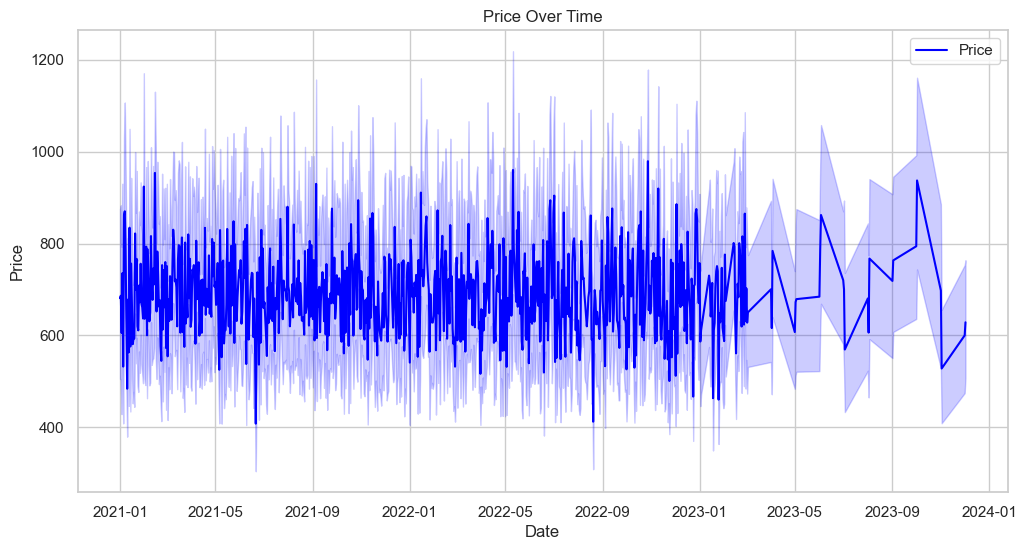

In [22]:
# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x='invoice_date', y='price', label='Price', color='blue')
 
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time')
 
plt.show()

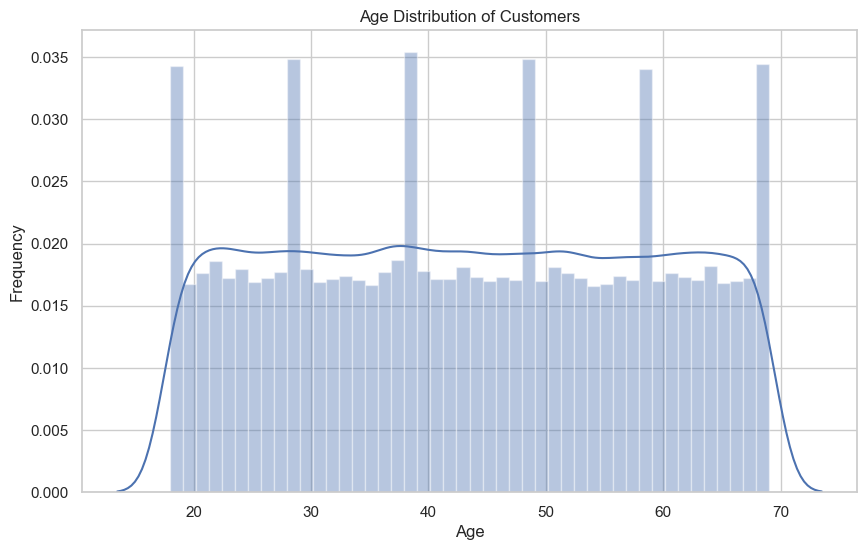

In [33]:
# Visualization of Age distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['age'])
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

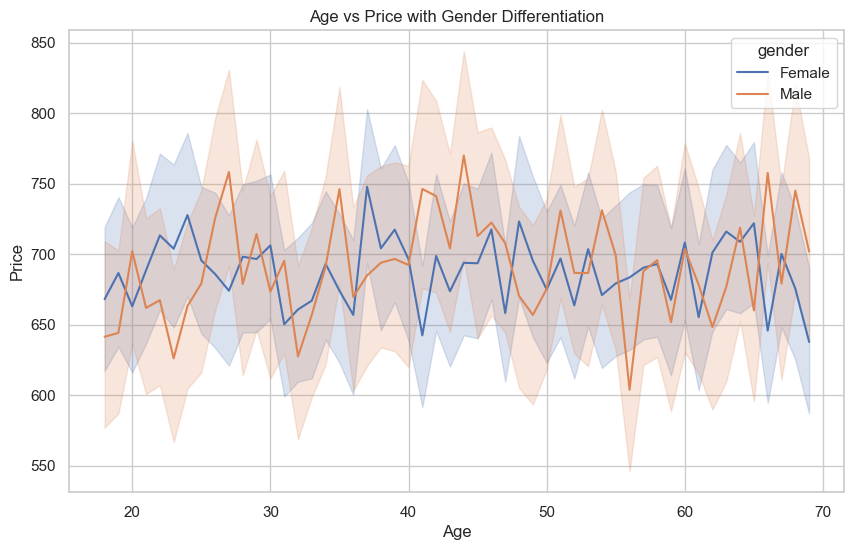

In [24]:
# Visualization of Purchasing behavior
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='price', data=df, hue='gender')
plt.title('Age vs Price with Gender Differentiation')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

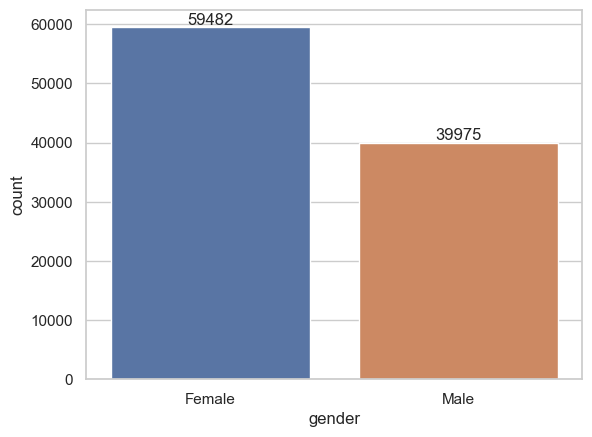

In [25]:
ax=sns.countplot(x='gender',data=df)
for i in ax.containers:
    ax.bar_label(i,)

<Axes: xlabel='price', ylabel='Count'>

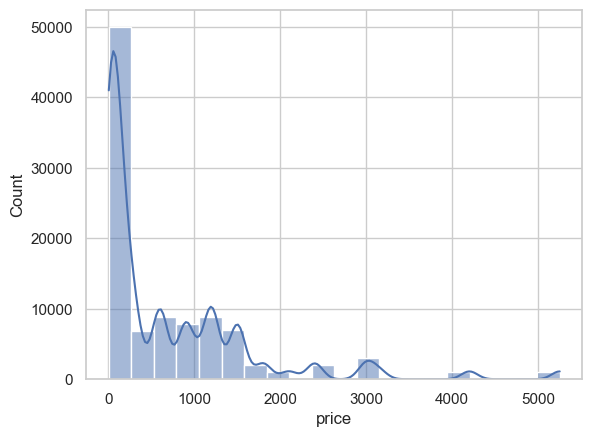

In [26]:
sns.histplot(df['price'],bins=20,kde=True)

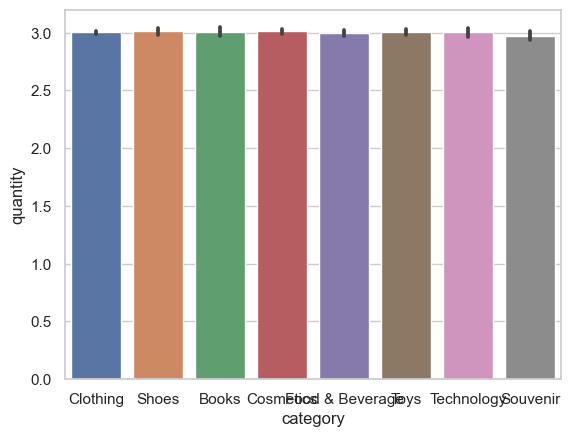

In [27]:
ax=sns.barplot(x='category',y='quantity',data=df)
plt.show()

In [28]:
df['Month'] = df['invoice_date'].dt.month
df['Year'] = df['invoice_date'].dt.year
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Month,Year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,5,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,9,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


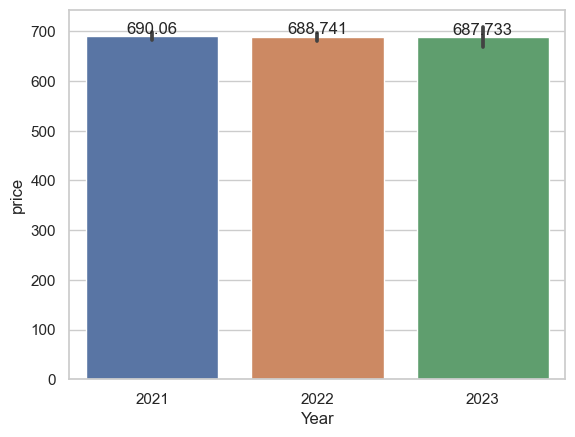

In [29]:
ax=sns.barplot(x='Year',y='price',data=df)
for i in ax.containers:
    ax.bar_label(i,)

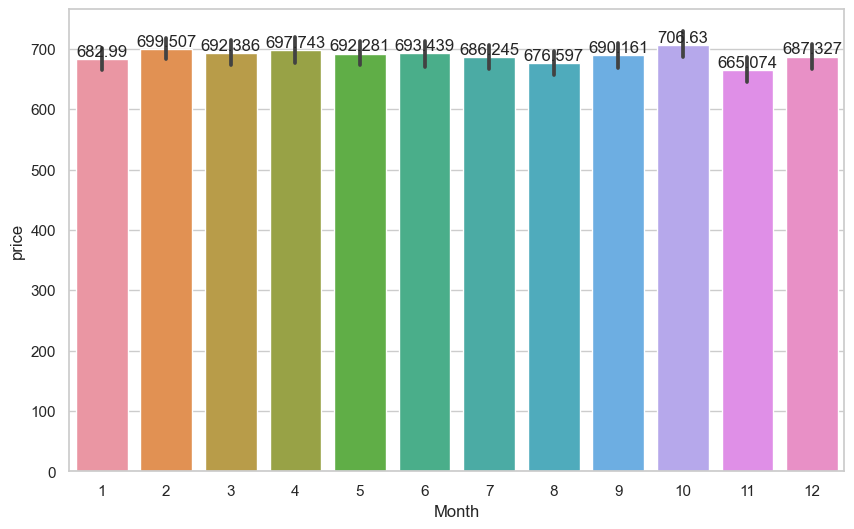

In [31]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Month',y='price',data=df)
for i in ax.containers:
    ax.bar_label(i,)